## Importing the packages

In [1]:
# Data Handling and Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import xgboost as xgb
import lightgbm as lgb

# Saving and Loading Models
import joblib

# Optional Libraries
from sklearn.pipeline import Pipeline


In [2]:
import pandas as pd

# Use absolute paths to load the data
df_customers = pd.read_csv(r"C:\Users\madhu\OneDrive\Documents\ml_project\Classification\customers.csv")
df_loans = pd.read_csv(r"C:\Users\madhu\OneDrive\Documents\ml_project\Classification\loans.csv")
df_bureau = pd.read_csv(r"C:\Users\madhu\OneDrive\Documents\ml_project\Classification\bureau_data.csv")

# Inspect the loaded data
df_customers.head()




,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [3]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [4]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [5]:
import pandas as pd

# Merge the DataFrames on 'cust_id'
df_concat = pd.merge(df_customers, df_loans, on="cust_id")

# Inspect the resulting DataFram
df_concat.head()


,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_concat1= pd.merge(df_concat, df_bureau, on="cust_id")

In [7]:
df_concat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [8]:
df_concat1['default']=df_concat1['default'].astype(int)
df_concat1['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_concat1.drop('default', axis=1)  # Drop 'default' column for features
y = df_concat1['default']  # Define 'default'| as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
X_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,bank_balance_at_application,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,566117,2022-04-21,2022-05-21,4,2,90,6,33,8,59
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,951329,2020-11-24,2020-12-11,3,1,119,4,17,4,92
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,771873,2019-08-25,2019-09-19,2,1,83,14,78,4,83
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,117343,2020-04-16,2020-05-05,1,1,37,0,0,5,34
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,67719,2024-01-26,2024-02-17,2,0,62,6,28,5,19


In [11]:
y_train.head()

27434    0
13400    0
883      0
7303     0
45124    0
Name: default, dtype: int32

In [12]:
df_train = pd.concat([X_train, y_train], axis="columns")
df_test = pd.concat([X_test, y_test], axis="columns")
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [13]:
df_train.shape

(37500, 33)

In [14]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [15]:
df_train['residence_type'].unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [16]:
df_train['residence_type'].mode()

0    Owned
Name: residence_type, dtype: object

In [17]:
# Replace NaN values with "Owned" in specific columns
df_train['residence_type'] = df_train['residence_type'].fillna("Owned")


In [18]:
df_test['residence_type'] = df_test['residence_type'].fillna("Owned")


In [19]:
df_train.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [20]:
df_train.duplicated()


27434    False
13400    False
883      False
7303     False
45124    False
         ...  
11284    False
44732    False
38158    False
860      False
15795    False
Length: 37500, dtype: bool

In [21]:
# Separate numeric and categorical columns
num_col = df_train.select_dtypes(include="number")  # Select numeric columns
cat_col = df_train.select_dtypes(exclude="number")  # Select non-numeric (categorical) columns

# Get lists of column names
num_col_list = num_col.columns.tolist()  # List of numeric column names
cat_col_list = cat_col.columns.tolist()  # List of categorical column names


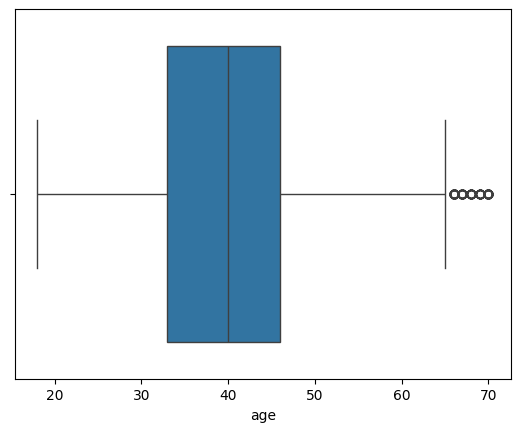

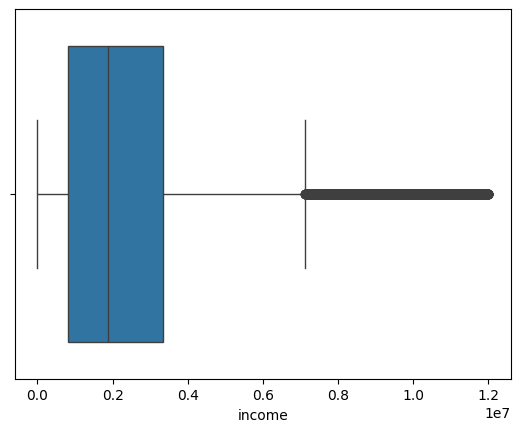

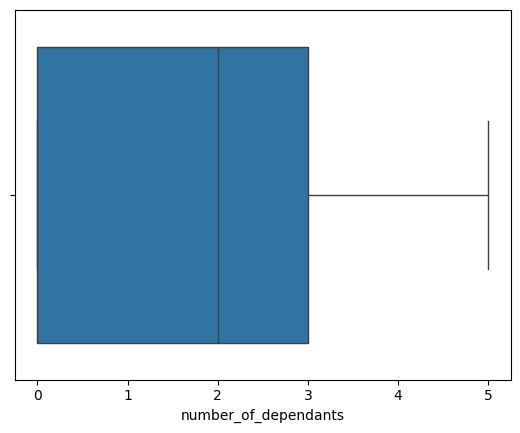

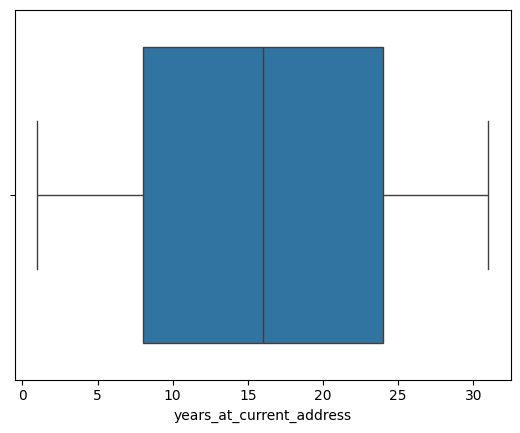

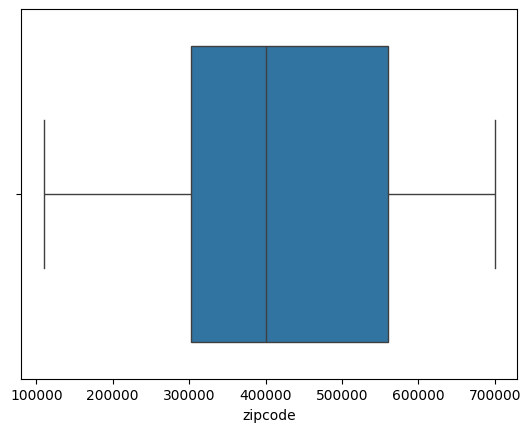

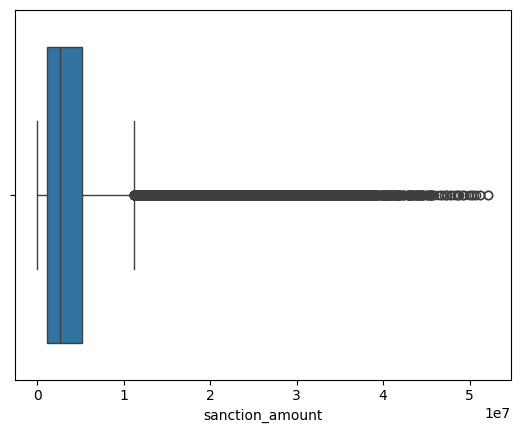

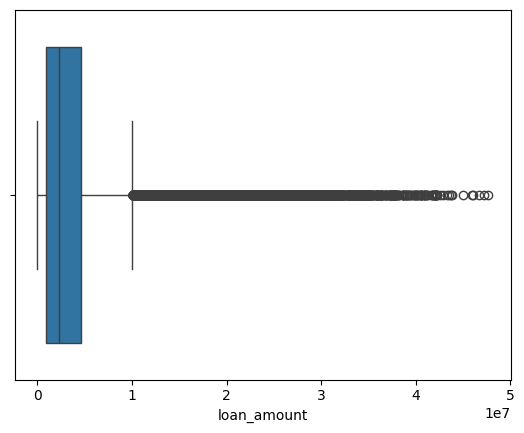

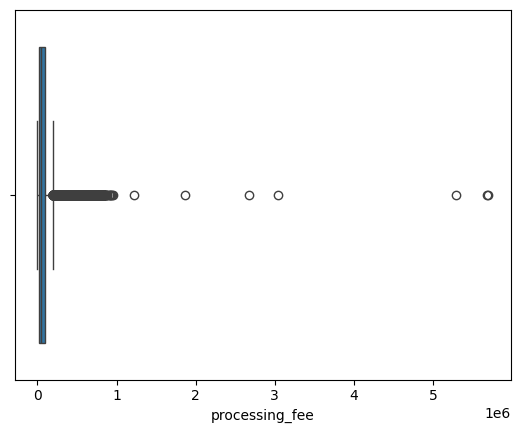

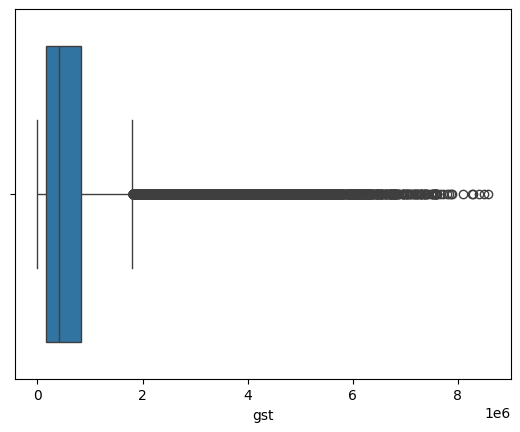

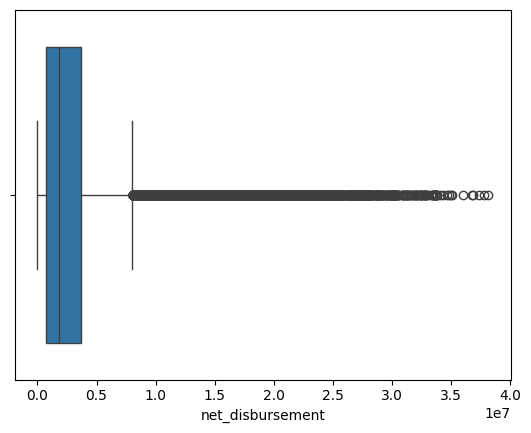

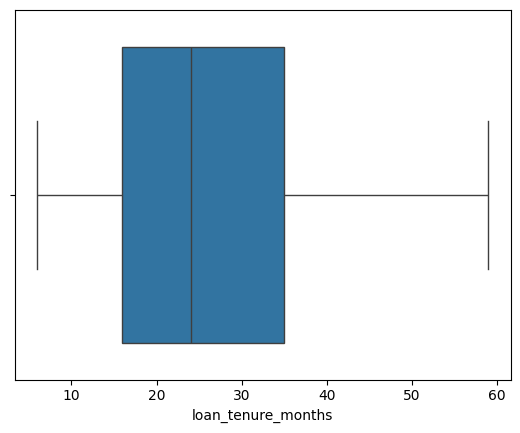

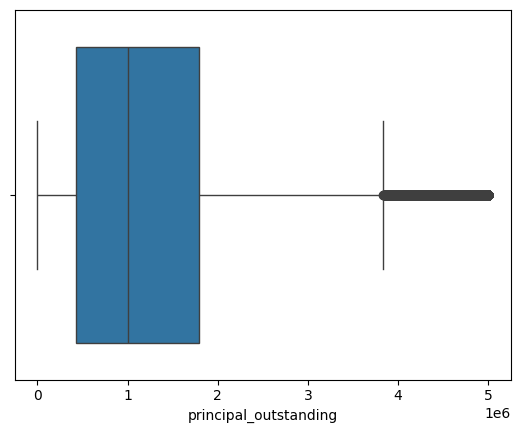

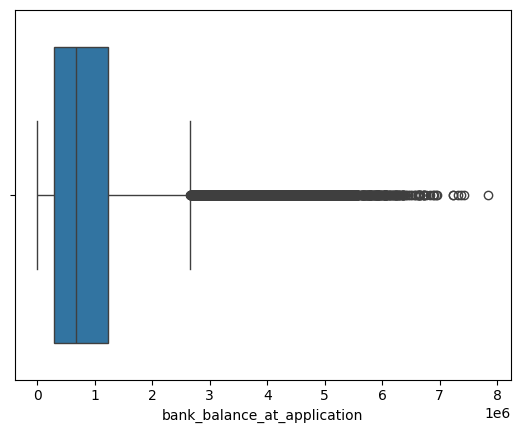

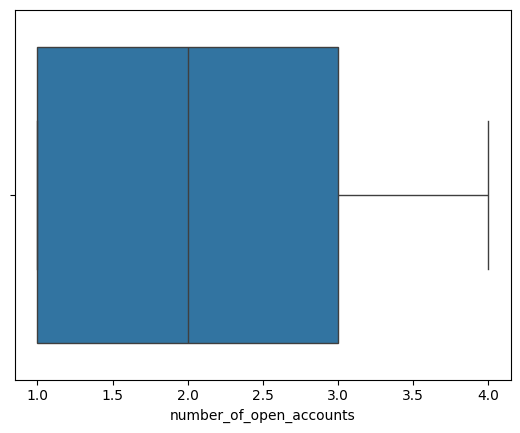

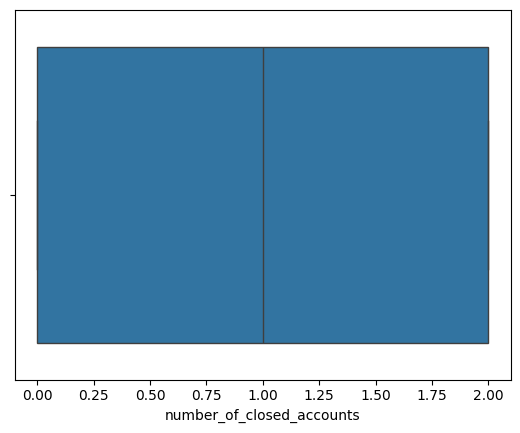

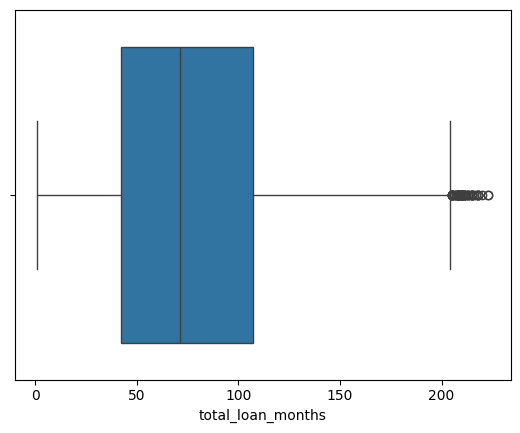

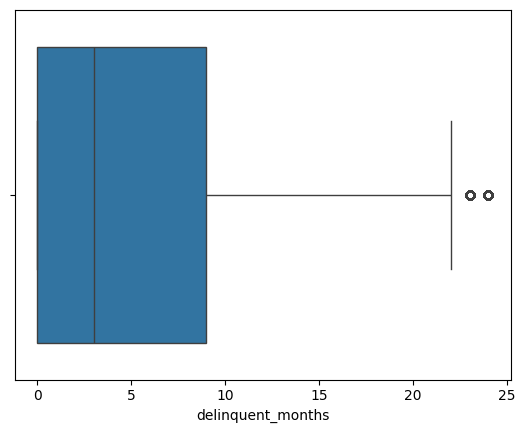

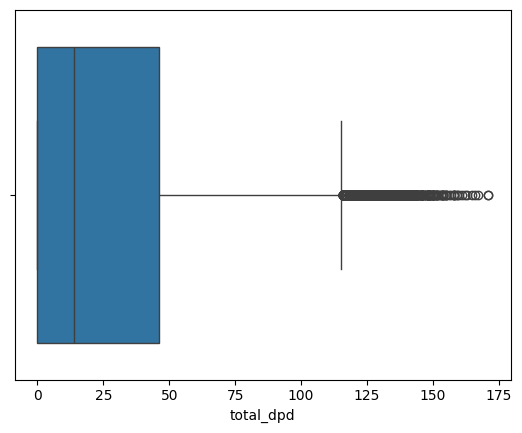

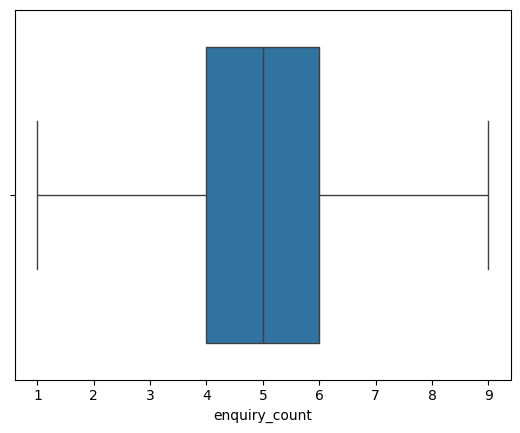

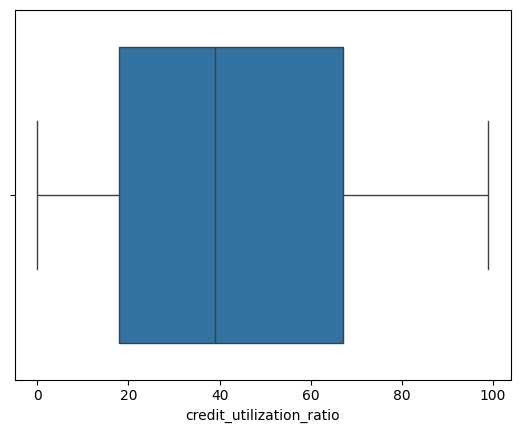

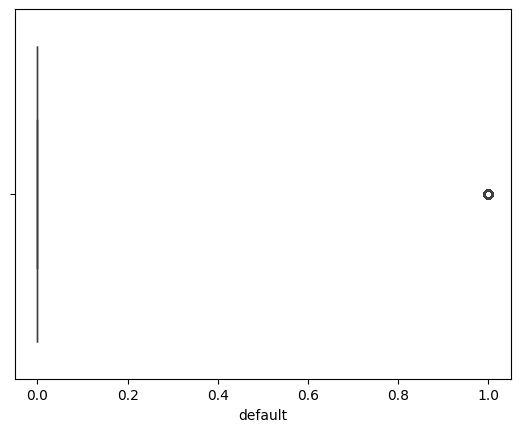

In [22]:
for i in num_col_list:
    sns.boxplot(data=df_train, x=i)  # Correct parameter name is `data` instead of `df`
    plt.show()


In [23]:
# Filter rows where processing_fee / loan_amount * 100 > 3
filtered_df = df_train[df_train['processing_fee'] / df_train['loan_amount'] * 100 > 3]

# Retrieve unique processing fee values from the filtered DataFrame
unique_values = filtered_df['processing_fee'].unique()

print(unique_values)


[2669791.02313528 5293543.52421439 1858964.76789005 5678020.85901
 5698029.90077503 1214492.67308835 3036378.00526686]


In [24]:
import numpy as np

# Replace processing_fee values that are greater than 3% of loan_amount
df_train['processing_fee'] = np.where(
    df_train['processing_fee'] / df_train['loan_amount'] * 100 > 3, 
    df_train['loan_amount'] * 0.03,  # Set processing fee to 3% of loan_amount
    df_train['processing_fee']  # Keep the original value if condition is not met
)


In [25]:
# Assuming the same logic for processing_fee for the test set, use parameters derived from df_train
df_test['processing_fee'] = np.where(
    df_test['processing_fee'] / df_test['loan_amount'] * 100 > 3, 
    df_test['loan_amount'] * 0.03,  # Cap at 3% of loan_amount
    df_test['processing_fee']  # Keep original value if condition is not met
)


In [26]:
df_train['processing_fee'].describe()

count     37500.000000
mean      80061.167733
std      108018.179098
min           0.000000
25%       19180.000000
50%       44700.000000
75%       91960.000000
max      953340.000000
Name: processing_fee, dtype: float64

In [27]:
df_train['loan_amount'].describe()

count    3.750000e+04
mean     4.002797e+06
std      5.400902e+06
min      0.000000e+00
25%      9.590000e+05
50%      2.234000e+06
75%      4.597250e+06
max      4.766700e+07
Name: loan_amount, dtype: float64

In [28]:
# Iterate over the categorical columns and print their unique values
for col in cat_col_list:
    unique_values = df_train[col].unique()  # Get unique values of the column
    print(f"The column '{col}' has the following unique values:")
    print(unique_values)
    print("-" * 50)  # Separator for better readability


The column 'cust_id' has the following unique values:
['C27435' 'C13401' 'C00884' ... 'C38159' 'C00861' 'C15796']
--------------------------------------------------
The column 'gender' has the following unique values:
['F' 'M']
--------------------------------------------------
The column 'marital_status' has the following unique values:
['Single' 'Married']
--------------------------------------------------
The column 'employment_status' has the following unique values:
['Salaried' 'Self-Employed']
--------------------------------------------------
The column 'residence_type' has the following unique values:
['Owned' 'Mortgage' 'Rented']
--------------------------------------------------
The column 'city' has the following unique values:
['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
--------------------------------------------------
The column 'state' has the following unique values:
['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka'

In [29]:
df_train['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
df_test['loan_purpose'].replace('Personaal', 'Personal', inplace=True)


C:\Users\madhu\AppData\Local\Temp\ipykernel_11756\1375370261.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['loan_purpose'].replace('Personaal', 'Personal', inplace=True)
C:\Users\madhu\AppData\Local\Temp\ipykernel_11756\1375370261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [30]:
df_train['loan_purpose'].unique()

array(['Home', 'Auto', 'Personal', 'Education'], dtype=object)

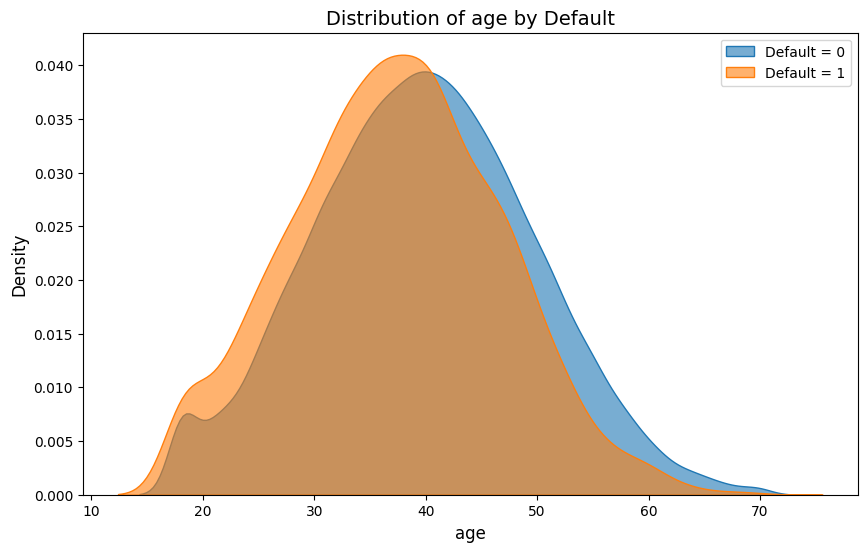

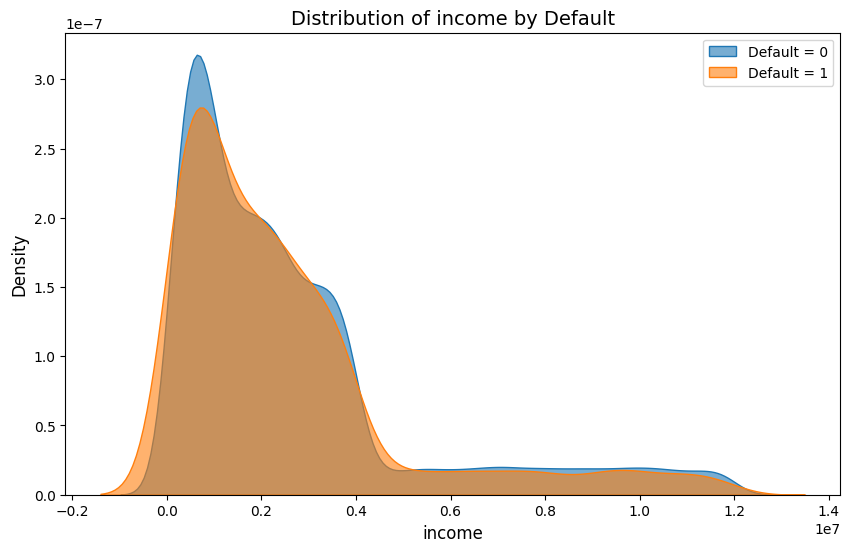

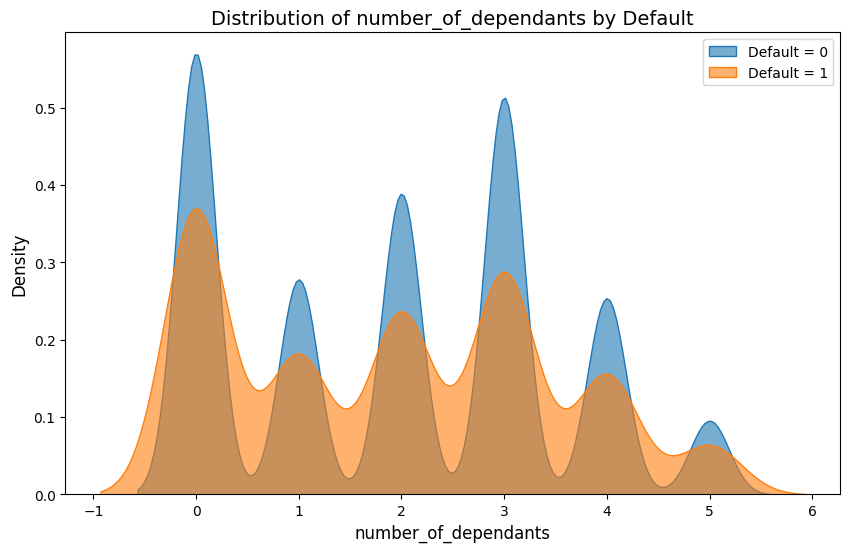

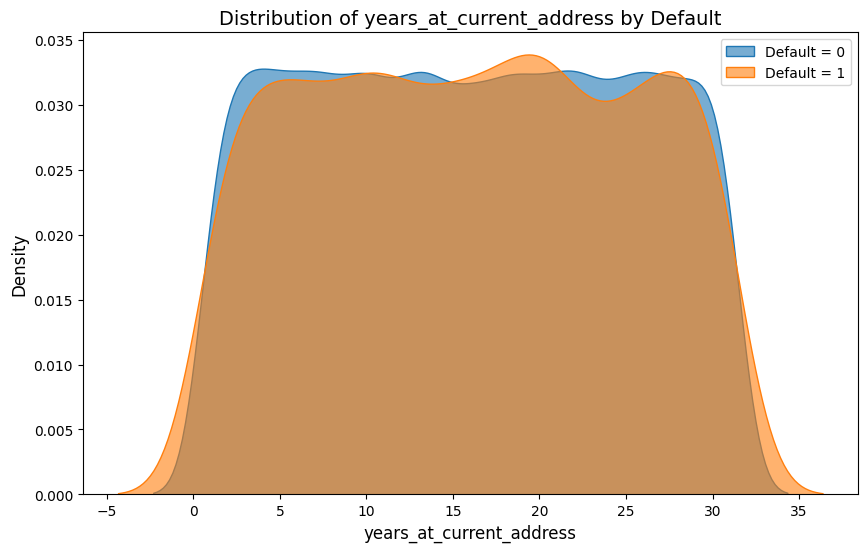

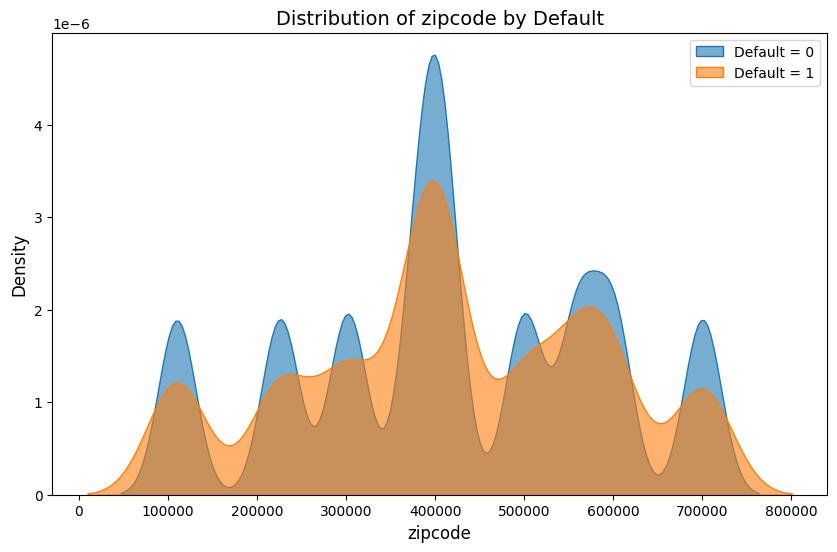

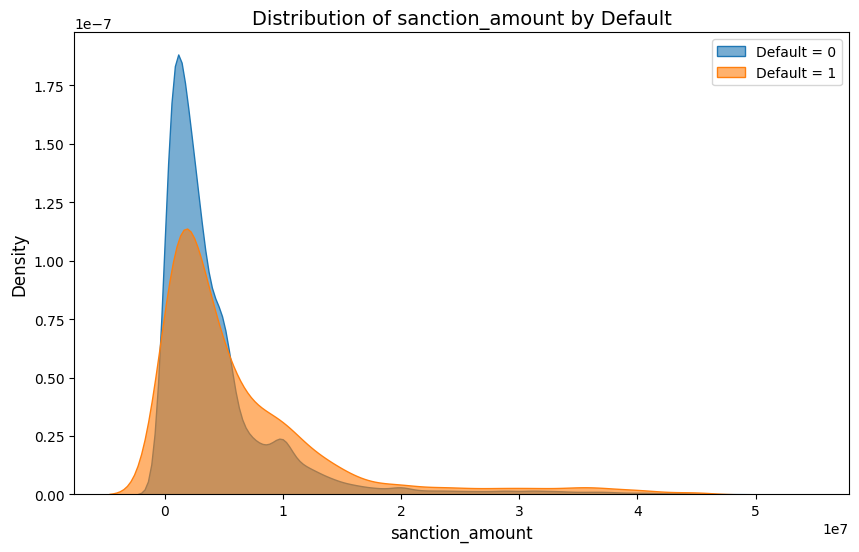

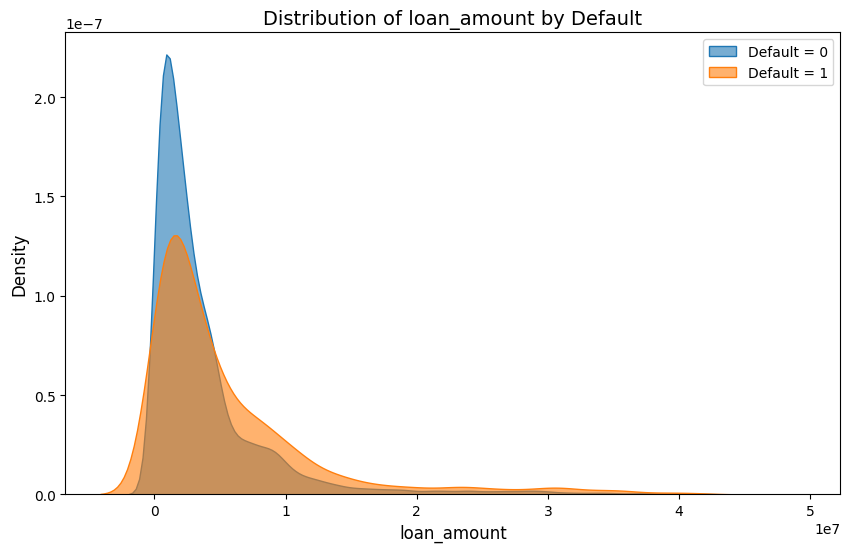

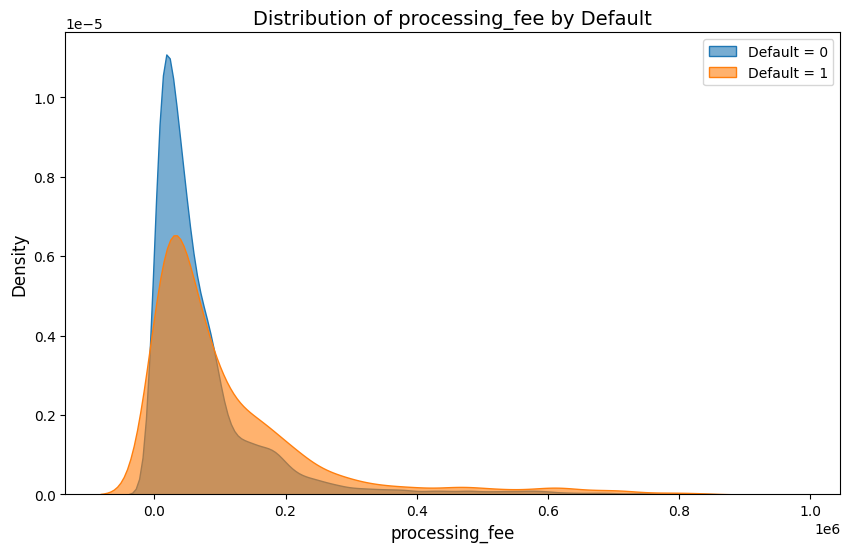

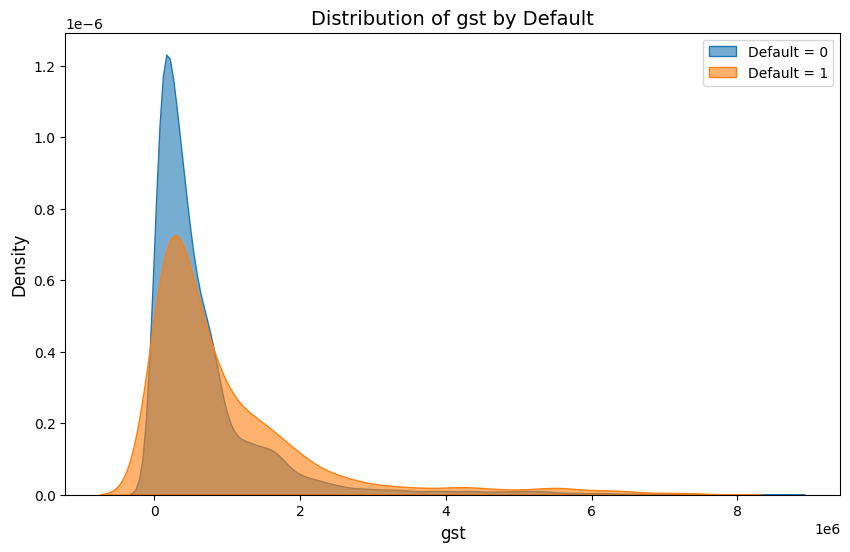

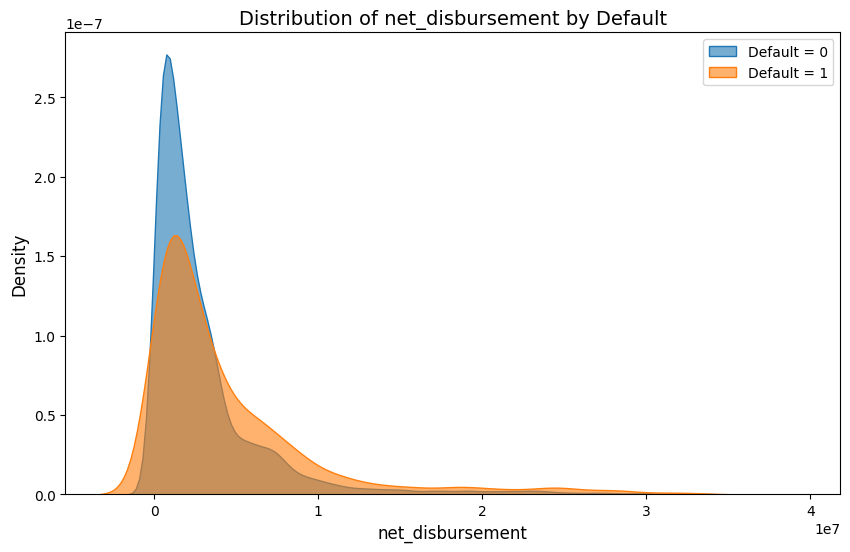

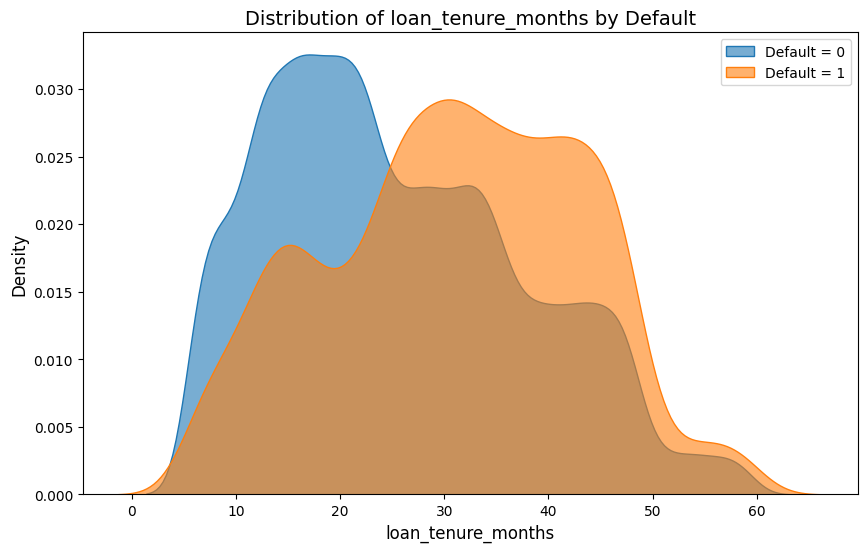

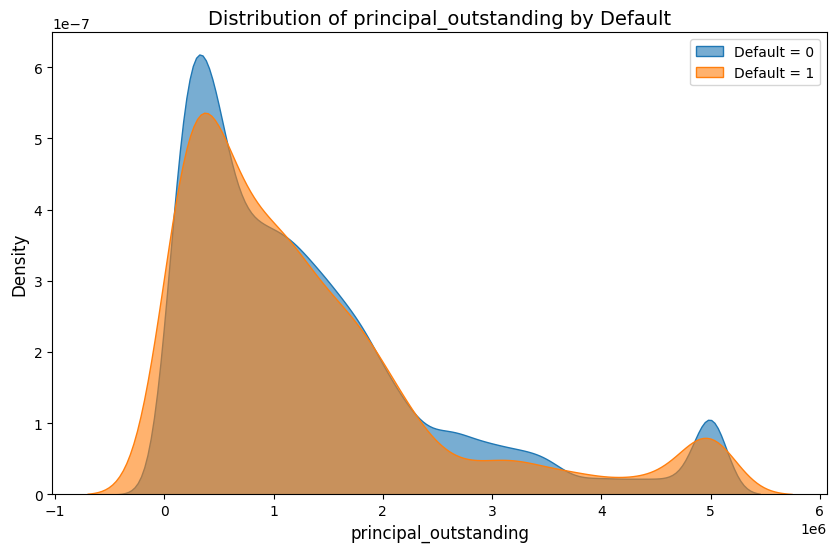

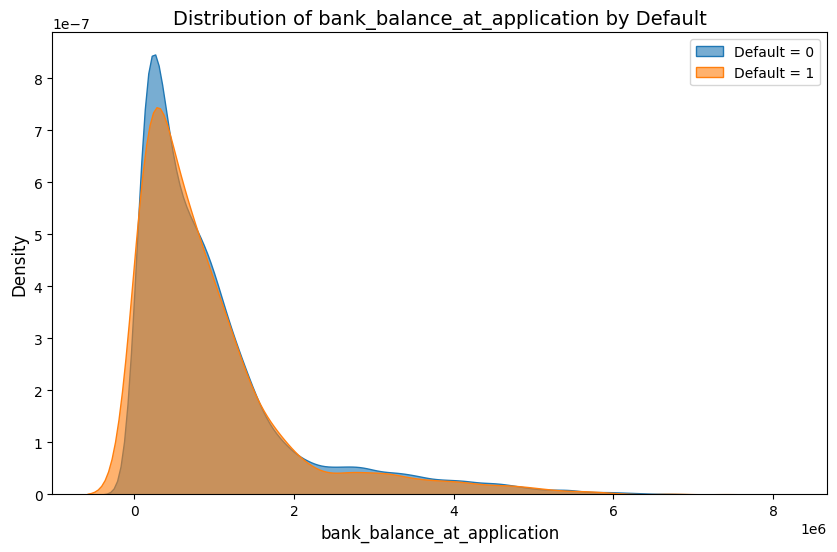

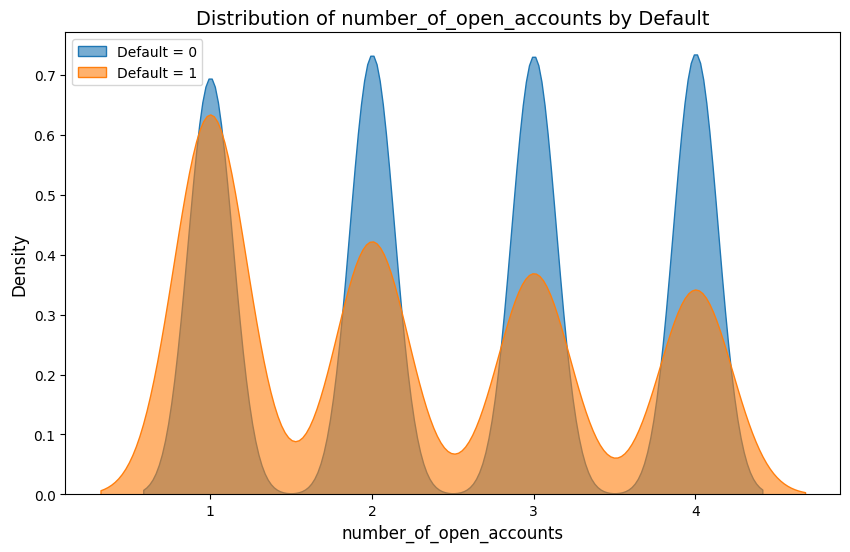

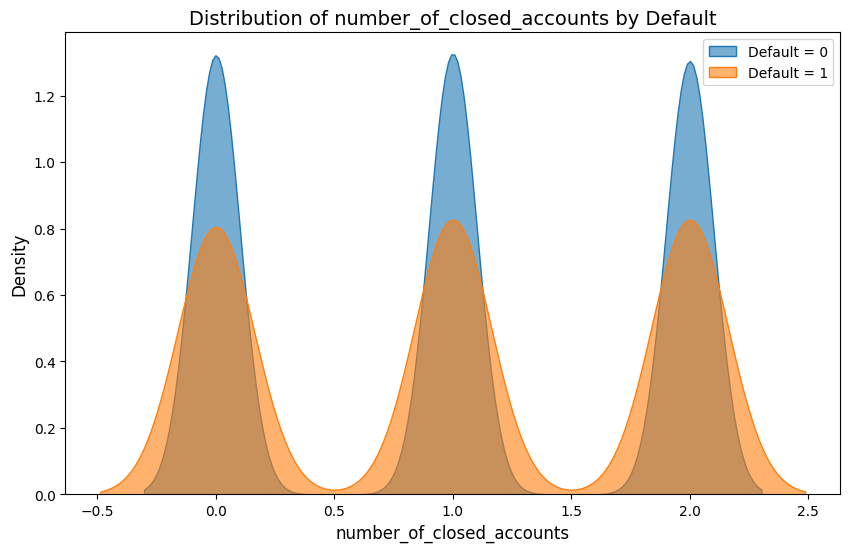

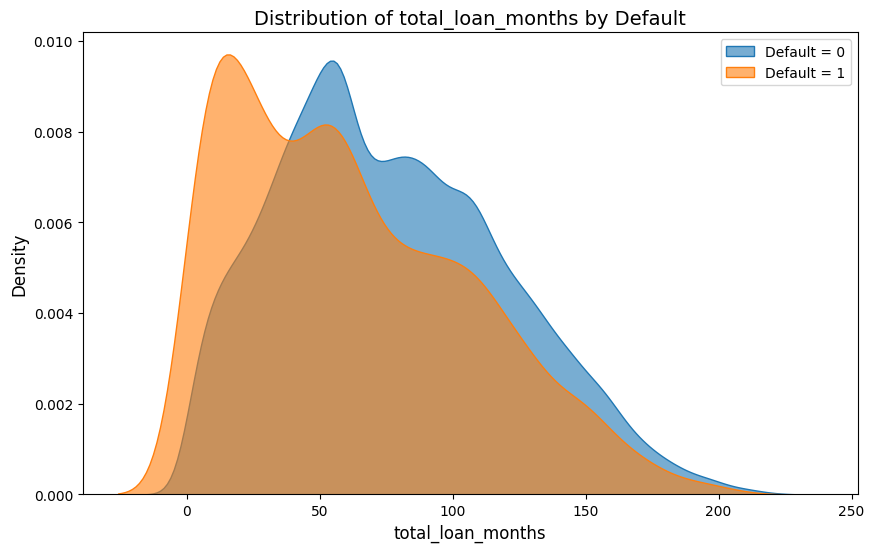

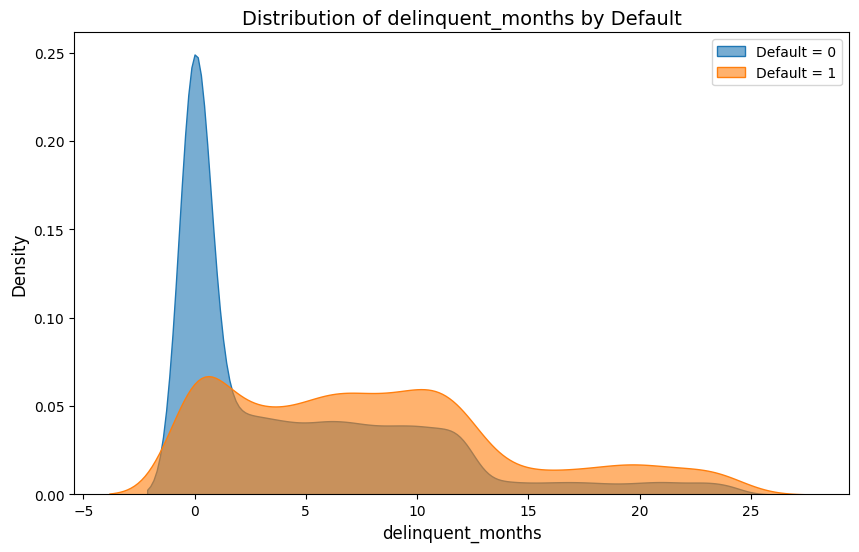

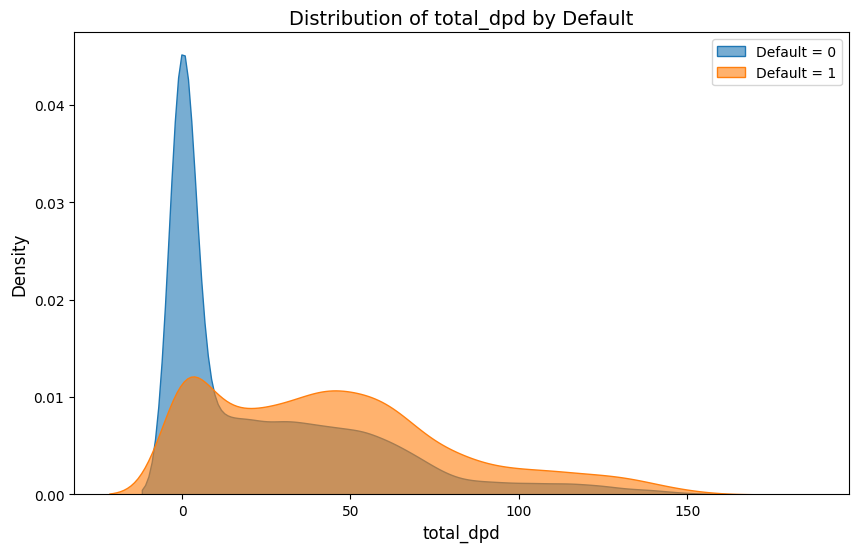

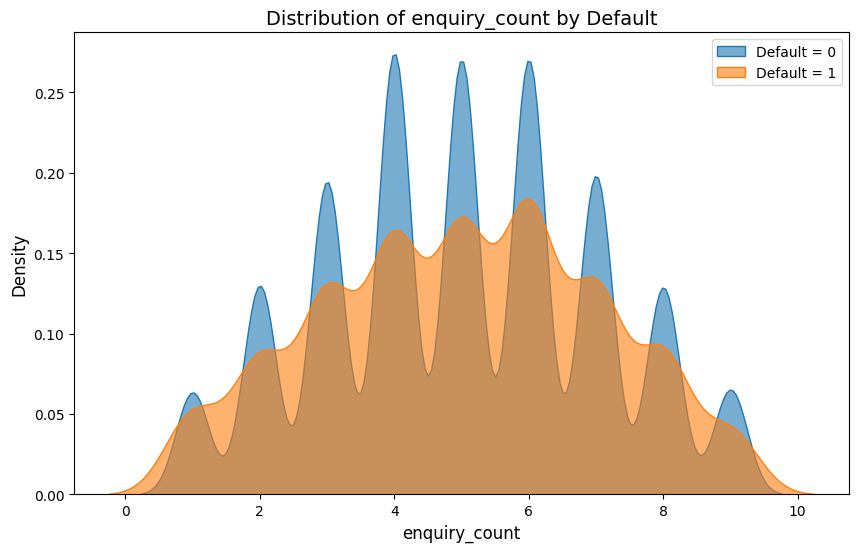

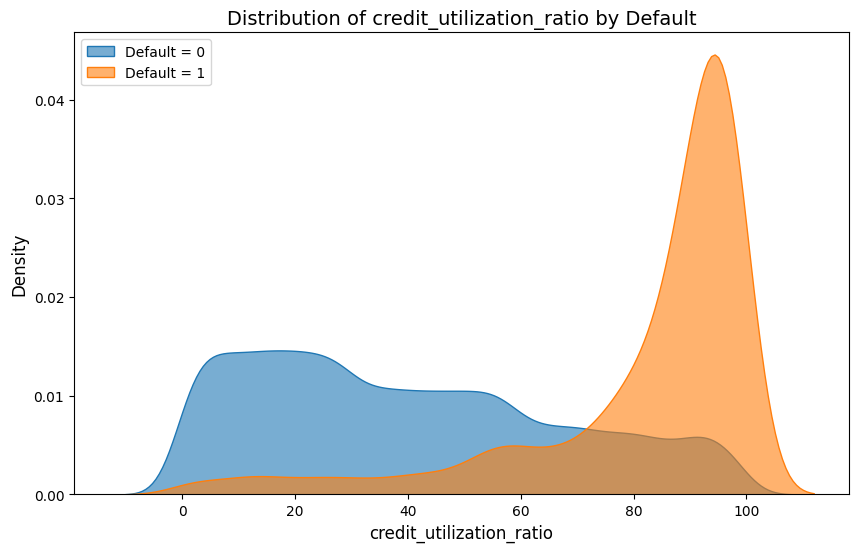

In [31]:
# Select only numeric features
numeric_features = df_train.select_dtypes(include=['number']).columns.tolist()
features = [col for col in numeric_features if col != 'default']

# Loop through numeric features only
for feature in features:
    plt.figure(figsize=(10, 6))  # Create a new figure for each feature
    sns.kdeplot(data=df_train[df_train['default'] == 0][feature], fill=True, label="Default = 0", alpha=0.6)
    sns.kdeplot(data=df_train[df_train['default'] == 1][feature], fill=True, label="Default = 1", alpha=0.6)
    
    # Add labels and title
    plt.title(f"Distribution of {feature} by Default", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    
    # Show the plot
    plt.show()


In [32]:
df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,C27435,45,F,Single,Salaried,1131000,0,Owned,5,Ahmedabad,...,2022-04-21,2022-05-21,4,2,90,6,33,8,59,0
13400,C13401,29,M,Single,Salaried,2343000,0,Owned,25,Delhi,...,2020-11-24,2020-12-11,3,1,119,4,17,4,92,0
883,C00884,50,F,Single,Self-Employed,2891000,0,Mortgage,29,Lucknow,...,2019-08-25,2019-09-19,2,1,83,14,78,4,83,0
7303,C07304,43,F,Single,Self-Employed,272000,1,Owned,27,Bangalore,...,2020-04-16,2020-05-05,1,1,37,0,0,5,34,0
45124,C45125,31,F,Single,Salaried,141000,0,Owned,27,Jaipur,...,2024-01-26,2024-02-17,2,0,62,6,28,5,19,0


In [33]:
# Calculate loan-to-income ratio for training and test datasets
df_train['loan_to_income'] = df_train['loan_amount'] / df_train['income']
df_test['loan_to_income'] = df_test['loan_amount'] / df_test['income']


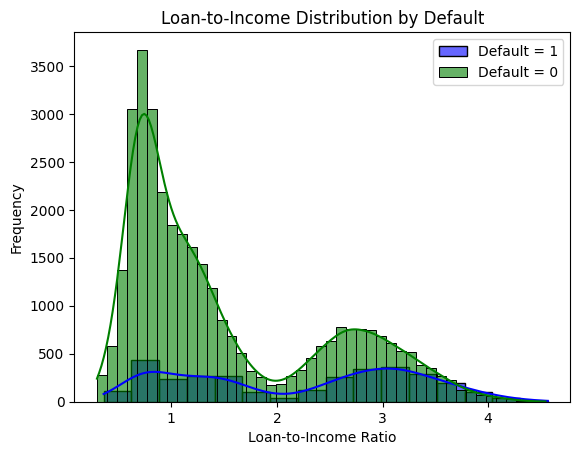

In [34]:
sns.histplot(df_train[df_train['default'] == 1]['loan_to_income'], label='Default = 1', kde=True, color='blue', alpha=0.6)
sns.histplot(df_train[df_train['default'] == 0]['loan_to_income'], label='Default = 0', kde=True, color='green', alpha=0.6)

# Add plot details
plt.title("Loan-to-Income Distribution by Default")
plt.xlabel("Loan-to-Income Ratio")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [35]:
df_train[['total_loan_months','delinquent_months']]

,total_loan_months,delinquent_months
27434,90,6
13400,119,4
883,83,14
7303,37,0
45124,62,6
...,...,...
11284,129,23
44732,80,0
38158,8,0
860,130,5


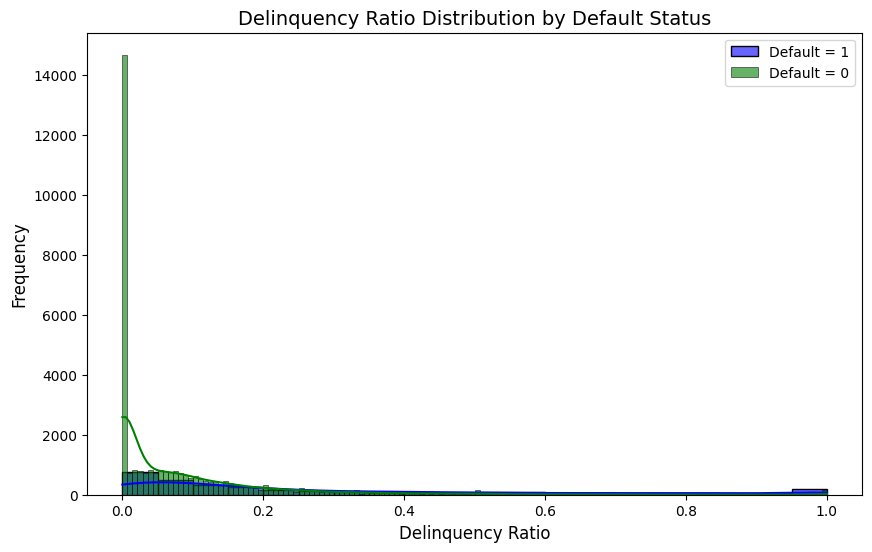

In [36]:
# Avoid division by zero
df_train['delinquency_ratio'] = df_train['delinquent_months'] / df_train['total_loan_months'].replace(0, np.nan)
df_test['delinquency_ratio'] = df_test['delinquent_months'] / df_test['total_loan_months'].replace(0, np.nan)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for delinquency_ratio by default status
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['default'] == 1]['delinquency_ratio'], kde=True, color='blue', label='Default = 1', alpha=0.6)
sns.histplot(df_train[df_train['default'] == 0]['delinquency_ratio'], kde=True, color='green', label='Default = 0', alpha=0.6)

# Add labels and legend
plt.title("Delinquency Ratio Distribution by Default Status", fontsize=14)
plt.xlabel("Delinquency Ratio", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


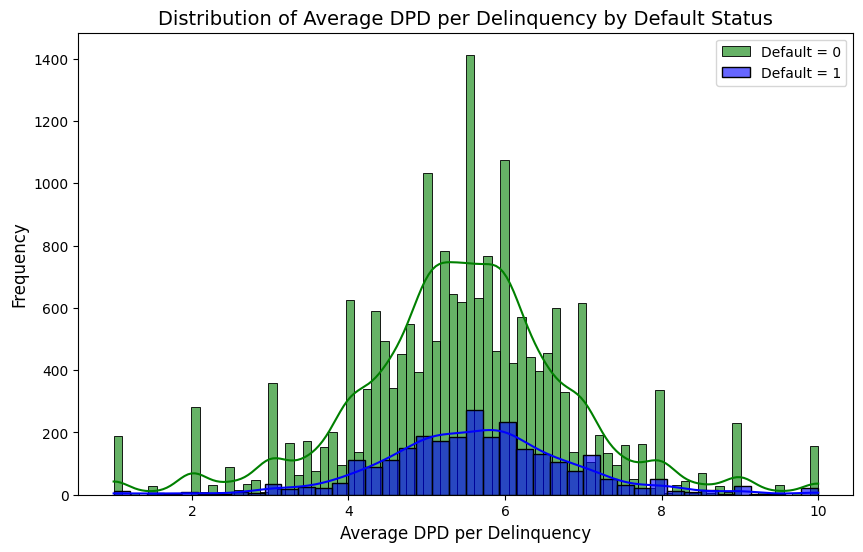

In [37]:
df_train['avg_dpd_per_delinquency'] = (
    df_train['total_dpd'] / df_train['delinquent_months'].replace(0, np.nan)
).round(1)
df_test['avg_dpd_per_delinquency'] = (
    df_test['total_dpd'] / df_test['delinquent_months'].replace(0, np.nan)
).round(1)
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for avg_dpd_per_delinquency by default status
plt.figure(figsize=(10, 6))
sns.histplot(df_train[df_train['default'] == 0]['avg_dpd_per_delinquency'], kde=True, color='green', label='Default = 0', alpha=0.6)
sns.histplot(df_train[df_train['default'] == 1]['avg_dpd_per_delinquency'], kde=True, color='blue', label='Default = 1', alpha=0.6)

# Add plot details
plt.title("Distribution of Average DPD per Delinquency by Default Status", fontsize=14)
plt.xlabel("Average DPD per Delinquency", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


In [38]:
# Columns to drop
columns_to_drop = [
    'cust_id', 'loan_id', 'disbursal_date', 'installment_start_dt',
    'loan_amount', 'income', 'total_loan_months', 'delinquent_months', 'total_dpd'
]

# Drop columns from df_train and df_test
df_train = df_train.drop(columns=columns_to_drop, axis='columns')
df_test = df_test.drop(columns=columns_to_drop, axis='columns')

# Verify remaining columns
df_train.columns
df_test.columns


Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [39]:
num_col

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,...,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
27434,45,1131000,0,5,380001,3458000,3276000,65520.0,589680,2620800,...,905176,566117,4,2,90,6,33,8,59,0
13400,29,2343000,0,25,110001,3103000,2540000,50800.0,457200,2032000,...,1008916,951329,3,1,119,4,17,4,92,0
883,50,2891000,0,29,226001,2288000,1920000,38400.0,345600,1536000,...,1382399,771873,2,1,83,14,78,4,83,0
7303,43,272000,1,27,560001,307000,298000,5960.0,53640,238400,...,170015,117343,1,1,37,0,0,5,34,0
45124,31,141000,0,27,302001,283000,260000,5200.0,46800,208000,...,72025,67719,2,0,62,6,28,5,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,33,3506000,0,31,500001,5201000,4760000,95200.0,856800,3808000,...,2397863,1408084,4,1,129,23,126,7,93,1
44732,33,3889000,0,26,110001,5400000,5302000,106040.0,954360,4241600,...,1676958,1215502,3,0,80,0,0,3,23,0
38158,35,2420000,3,5,700001,8212000,6570000,131400.0,1182600,5256000,...,1497625,993374,1,2,8,0,0,2,53,0
860,42,2133000,4,6,400001,3755000,3194000,63880.0,574920,2555200,...,1316297,672134,3,1,130,5,24,7,17,0


In [40]:
# Select columns with data types int64 and float64
numeric_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Display the selected numeric columns
numeric_columns.columns


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [41]:
df_train['avg_dpd_per_delinquency'] = df_train['avg_dpd_per_delinquency'].fillna(0)


In [42]:
df_train1=df_train

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Define features (X_train) and target (y_train)
X_train = df_train.drop('default', axis=1)  # Drop the target column from features
y_train = df_train['default']  # Target column

# Select numeric columns for scaling
cols_to_scale = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Check the result
X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519231,F,Single,Salaried,0.0,Owned,0.133333,Ahmedabad,Gujarat,0.457627,...,0.339623,0.181035,0.072148,1.000000,1.0,0.875,0.595960,0.609125,0.066667,0.55
13400,0.211538,M,Single,Salaried,0.0,Owned,0.800000,Delhi,Delhi,0.000000,...,0.509434,0.201783,0.121240,0.666667,0.5,0.375,0.929293,0.184564,0.033613,0.42
883,0.615385,F,Single,Self-Employed,0.0,Mortgage,0.933333,Lucknow,Uttar Pradesh,0.196610,...,0.245283,0.276480,0.098370,0.333333,0.5,0.375,0.838384,0.086193,0.168675,0.56
7303,0.480769,F,Single,Self-Employed,0.2,Owned,0.866667,Bangalore,Karnataka,0.762712,...,0.283019,0.034003,0.014955,0.000000,0.5,0.500,0.343434,0.187259,0.000000,0.00
45124,0.250000,F,Single,Salaried,0.0,Owned,0.866667,Jaipur,Rajasthan,0.325424,...,0.735849,0.014405,0.008630,0.333333,0.0,0.500,0.191919,0.362564,0.096774,0.47


In [44]:
X_test.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,bank_balance_at_application,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
33553,C33554,36,F,Married,Self-Employed,3373000,3,Owned,15,Hyderabad,...,1788591,2022-11-30,2022-12-21,2,2,70,3,27,5,12
9427,C09428,33,F,Single,Salaried,2725000,0,Owned,15,Jaipur,...,810309,2020-07-02,2020-07-15,4,0,115,0,0,9,85
199,C00200,28,M,Single,Self-Employed,1071000,0,Owned,19,Delhi,...,332456,2019-07-31,2019-08-02,4,1,144,0,0,4,72
12447,C12448,28,M,Married,Salaried,1183000,3,Rented,4,Delhi,...,346879,2020-10-20,2020-10-31,3,2,93,0,0,4,90
39489,C39490,52,M,Married,Self-Employed,2079000,2,Owned,26,Pune,...,497720,2023-07-05,2023-08-02,4,2,152,20,105,9,53


In [45]:
# Define features (X_test)
X_test = df_test.drop('default', axis=1)  # Drop the target column if it exists
y_test = df_test['default']  # Target column

# Scale the numeric columns using the already-fitted scaler
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Check the result
X_test.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
33553,0.346154,F,Married,Self-Employed,0.6,Owned,0.466667,Hyderabad,Telangana,0.661017,...,0.528302,0.308355,0.227943,0.333333,1.0,0.500,0.121212,0.257996,0.042857,0.90
9427,0.288462,F,Single,Salaried,0.0,Owned,0.466667,Jaipur,Rajasthan,0.325424,...,0.622642,0.271091,0.103268,1.000000,0.0,1.000,0.858586,0.689661,0.000000,NaN
199,0.192308,M,Single,Self-Employed,0.0,Owned,0.600000,Delhi,Delhi,0.000000,...,0.622642,0.107719,0.042369,1.000000,0.5,0.375,0.727273,0.636856,0.000000,NaN
12447,0.192308,M,Married,Salaried,0.6,Rented,0.100000,Delhi,Delhi,0.000000,...,0.188679,0.124263,0.044207,0.666667,1.0,0.375,0.909091,0.188035,0.000000,NaN
39489,0.653846,M,Married,Self-Employed,0.4,Owned,0.833333,Pune,Maharashtra,0.510169,...,0.377358,0.298140,0.063431,1.000000,1.0,1.000,0.535354,0.169262,0.131579,0.52


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

def calculate_vif(df):
    """
    Calculate Variance Inflation Factor (VIF) for a DataFrame.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing numerical features only.

    Returns:
    pd.DataFrame: DataFrame with feature names and corresponding VIF values.
    """
    
    # Ensure df contains only numeric columns
    numeric_cols = df_train1.select_dtypes(include=['int64', 'float64']).columns
    df_numeric = df[numeric_cols].dropna()  # Drop rows with missing values

    # Add a constant column for the intercept in VIF calculation
    X = add_constant(df_numeric)

    # Compute VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Drop the constant term from results and format numbers normally
    vif_data = vif_data[vif_data["Feature"] != "const"]
    vif_data["VIF"] = vif_data["VIF"].astype(float).round(2)  # Format values normally

    return vif_data


In [47]:
df_train = df_train[cols_to_scale].fillna(df_train[cols_to_scale].median())


In [48]:
calculate_vif(df_train[cols_to_scale])

C:\Users\madhu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
1,age,1.16
2,number_of_dependants,1.07
3,years_at_current_address,1.00
4,zipcode,1.00
5,sanction_amount,66.19
6,processing_fee,67377.68
7,gst,inf
8,net_disbursement,inf
9,loan_tenure_months,1.75
10,principal_outstanding,7.60


In [49]:
df_train_1 = df_train.drop(['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding'], axis=1)
df_train_1

,age,number_of_dependants,years_at_current_address,zipcode,loan_tenure_months,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,45,0,5,380001,24,566117,4,2,8,59,2.896552,0.066667,5.5
13400,29,0,25,110001,33,951329,3,1,4,92,1.084080,0.033613,4.2
883,50,0,29,226001,19,771873,2,1,4,83,0.664130,0.168675,5.6
7303,43,1,27,560001,21,117343,1,1,5,34,1.095588,0.000000,0.0
45124,31,0,27,302001,45,67719,2,0,5,19,1.843972,0.096774,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,33,0,31,500001,19,1408084,4,1,7,93,1.357673,0.178295,5.5
44732,33,0,26,110001,12,1215502,3,0,3,23,1.363332,0.000000,0.0
38158,35,3,5,700001,48,993374,1,2,2,53,2.714876,0.000000,0.0
860,42,4,6,400001,22,672134,3,1,7,17,1.497421,0.038462,4.8


In [50]:
numeric_cols = df_train_1.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['age',
 'number_of_dependants',
 'years_at_current_address',
 'zipcode',
 'loan_tenure_months',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'enquiry_count',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

In [51]:
vif_df=df_train_1

In [52]:
columns_categorical = X_train.select_dtypes(include=['object']).columns
columns_categorical

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type'],
      dtype='object')

In [53]:
# Get the data types of all columns
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 33553 to 37270
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          12500 non-null  float64
 1   gender                       12500 non-null  object 
 2   marital_status               12500 non-null  object 
 3   employment_status            12500 non-null  object 
 4   number_of_dependants         12500 non-null  float64
 5   residence_type               12500 non-null  object 
 6   years_at_current_address     12500 non-null  float64
 7   city                         12500 non-null  object 
 8   state                        12500 non-null  object 
 9   zipcode                      12500 non-null  float64
 10  loan_purpose                 12500 non-null  object 
 11  loan_type                    12500 non-null  object 
 12  sanction_amount              12500 non-null  float64
 13  processing_fee   

In [54]:
temp = pd.concat([X_train, y_train], axis=1)
temp.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'default'],
      dtype='object')

In [55]:
X_train

,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
27434,0.519231,F,Single,Salaried,0.0,Owned,0.133333,Ahmedabad,Gujarat,0.457627,...,0.339623,0.181035,0.072148,1.000000,1.0,0.875,0.595960,0.609125,0.066667,0.55
13400,0.211538,M,Single,Salaried,0.0,Owned,0.800000,Delhi,Delhi,0.000000,...,0.509434,0.201783,0.121240,0.666667,0.5,0.375,0.929293,0.184564,0.033613,0.42
883,0.615385,F,Single,Self-Employed,0.0,Mortgage,0.933333,Lucknow,Uttar Pradesh,0.196610,...,0.245283,0.276480,0.098370,0.333333,0.5,0.375,0.838384,0.086193,0.168675,0.56
7303,0.480769,F,Single,Self-Employed,0.2,Owned,0.866667,Bangalore,Karnataka,0.762712,...,0.283019,0.034003,0.014955,0.000000,0.5,0.500,0.343434,0.187259,0.000000,0.00
45124,0.250000,F,Single,Salaried,0.0,Owned,0.866667,Jaipur,Rajasthan,0.325424,...,0.735849,0.014405,0.008630,0.333333,0.0,0.500,0.191919,0.362564,0.096774,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.288462,F,Single,Salaried,0.0,Rented,1.000000,Hyderabad,Telangana,0.661017,...,0.245283,0.479573,0.179450,1.000000,0.5,0.750,0.939394,0.248651,0.178295,0.55
44732,0.288462,F,Single,Salaried,0.0,Owned,0.833333,Delhi,Delhi,0.000000,...,0.113208,0.335392,0.154907,0.666667,0.0,0.250,0.232323,0.249977,0.000000,0.00
38158,0.326923,M,Married,Self-Employed,0.6,Rented,0.133333,Kolkata,West Bengal,1.000000,...,0.792453,0.299525,0.126599,0.000000,1.0,0.125,0.535354,0.566568,0.000000,0.00
860,0.461538,F,Married,Salaried,0.8,Owned,0.166667,Mumbai,Maharashtra,0.491525,...,0.301887,0.263260,0.085659,0.666667,0.5,0.750,0.171717,0.281386,0.038462,0.48


In [56]:
y_train.head()

27434    0
13400    0
883      0
7303     0
45124    0
Name: default, dtype: int32

In [57]:
import numpy as np
import pandas as pd

def calculate_iv(df, categorical_features, target, threshold=0.01):  # Reduced threshold
    iv_values = []

    # Fill missing values
    df[categorical_features] = df[categorical_features].fillna('Missing')

    for feature in categorical_features:
        grouped = df.groupby(feature)[target].agg(['count', 'sum'])
        grouped.columns = ['Total', 'Bad']
        grouped['Good'] = grouped['Total'] - grouped['Bad']

        # Smoothing for WoE calculation
        grouped['Good'] = grouped['Good'].replace(0, 0.001)
        grouped['Bad'] = grouped['Bad'].replace(0, 0.001)

        grouped['% Good'] = grouped['Good'] / grouped['Good'].sum()
        grouped['% Bad'] = grouped['Bad'] / grouped['Bad'].sum()

        grouped['WoE'] = np.log(grouped['% Good'] / grouped['% Bad'])
        grouped['IV'] = (grouped['% Good'] - grouped['% Bad']) * grouped['WoE']

        total_iv = grouped['IV'].sum()
        iv_values.append({'Feature': feature, 'IV': total_iv})

    iv_df = pd.DataFrame(iv_values).sort_values(by='IV', ascending=False)

    # Adjust threshold if too strict
    selected_features = iv_df[iv_df['IV'] > threshold]

    return selected_features


In [58]:
calculate_iv(temp, columns_categorical, 'default', )

,Feature,IV
6,loan_purpose,0.393867
3,residence_type,0.259038
7,loan_type,0.173110


In [59]:
selected_features_iv = [
    'age',
    'residence_type',
    'loan_purpose',
    'loan_type',
    'loan_tenure_months',
    'number_of_open_accounts',
    'credit_utilization_ratio',
    'loan_to_income',
    'delinquency_ratio',
    'avg_dpd_per_delinquency'
]


In [60]:
# Ensure selected features exist in X_train and X_test
selected_features_iv = [feature for feature in selected_features_iv if feature in X_train.columns]

# Reduce training and test sets
X_train_reduced = X_train[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]


In [61]:
# One-Hot Encoding with drop_first=True to avoid multicollinearity
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first=True)


In [62]:
X_test_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
33553,0.346154,0.528302,0.333333,0.121212,0.257996,0.042857,0.90,True,False,True,False,False,False
9427,0.288462,0.622642,1.000000,0.858586,0.689661,0.000000,NaN,True,False,False,True,False,False
199,0.192308,0.622642,1.000000,0.727273,0.636856,0.000000,NaN,True,False,False,True,False,False
12447,0.192308,0.188679,0.666667,0.909091,0.188035,0.000000,NaN,False,True,False,False,False,False
39489,0.653846,0.377358,1.000000,0.535354,0.169262,0.131579,0.52,True,False,False,False,False,False


In [63]:
# Fill missing values in X_train_encoded and X_test_encoded
X_train_encoded = X_train_encoded.fillna(X_train_encoded.median())
X_test_encoded = X_test_encoded.fillna(X_test_encoded.median())


In [64]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression  # Use Logistic Regression for classification
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train_encoded, y_train)

# Make predictions
y_pred = model_lr.predict(X_test_encoded)  # Ensure using X_test_encoded, not y_test

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11392
           1       0.79      0.74      0.77      1108

    accuracy                           0.96     12500
   macro avg       0.88      0.86      0.87     12500
weighted avg       0.96      0.96      0.96     12500



In [65]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_encoded)

# Print classification report
print("📌 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


📌 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11392
           1       0.79      0.74      0.76      1108

    accuracy                           0.96     12500
   macro avg       0.88      0.86      0.87     12500
weighted avg       0.96      0.96      0.96     12500



In [66]:
# Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)

# Train the model
xgb_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_encoded)

# Print classification report
print("📌 XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


📌 XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11392
           1       0.81      0.76      0.78      1108

    accuracy                           0.96     12500
   macro avg       0.89      0.87      0.88     12500
weighted avg       0.96      0.96      0.96     12500



In [67]:
print(X_train_encoded.isnull().sum())  # Check missing values
print(y_train.isnull().sum())  # Check missing values in target


age                         0
loan_tenure_months          0
number_of_open_accounts     0
credit_utilization_ratio    0
loan_to_income              0
delinquency_ratio           0
avg_dpd_per_delinquency     0
residence_type_Owned        0
residence_type_Rented       0
loan_purpose_Education      0
loan_purpose_Home           0
loan_purpose_Personal       0
loan_type_Unsecured         0
dtype: int64
0


In [68]:
print(type(y_train))  # Should be Series, not DataFrame


<class 'pandas.core.series.Series'>


In [69]:
print(X_train_encoded.dtypes)  # Should be numeric (int/float)
print(y_train.dtypes)  # Should be int (0 or 1) for classification


age                         float64
loan_tenure_months          float64
number_of_open_accounts     float64
credit_utilization_ratio    float64
loan_to_income              float64
delinquency_ratio           float64
avg_dpd_per_delinquency     float64
residence_type_Owned           bool
residence_type_Rented          bool
loan_purpose_Education         bool
loan_purpose_Home              bool
loan_purpose_Personal          bool
loan_type_Unsecured            bool
dtype: object
int32


In [70]:
# Convert boolean columns to integers (0/1)
X_train_encoded = X_train_encoded.astype(float)  # Convert all to float
X_train_encoded[X_train_encoded.select_dtypes(include=['bool']).columns] = X_train_encoded.select_dtypes(include=['bool']).astype(int)

X_test_encoded = X_test_encoded.astype(float)
X_test_encoded[X_test_encoded.select_dtypes(include=['bool']).columns] = X_test_encoded.select_dtypes(include=['bool']).astype(int)

# Verify data types again
print(X_train_encoded.dtypes)


age                         float64
loan_tenure_months          float64
number_of_open_accounts     float64
credit_utilization_ratio    float64
loan_to_income              float64
delinquency_ratio           float64
avg_dpd_per_delinquency     float64
residence_type_Owned        float64
residence_type_Rented       float64
loan_purpose_Education      float64
loan_purpose_Home           float64
loan_purpose_Personal       float64
loan_type_Unsecured         float64
dtype: object


In [71]:
import pandas as pd

# Convert NumPy array to Pandas Series
y_train_under_series = pd.Series(y_train)

# Check new class distribution
print("Class Distribution After Undersampling:")
print(y_train_under_series.value_counts(normalize=True) * 100)


Class Distribution After Undersampling:
default
0    91.496
1     8.504
Name: proportion, dtype: float64


In [72]:
# Install imbalanced-learn if not already installed
!pip install imbalanced-learn

# Import the necessary library
from imblearn.under_sampling import RandomUnderSampler

# Initialize undersampling
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_train_under, y_train_under_series = undersampler.fit_resample(X_train_encoded, y_train)

# Verify the new class distribution
print("Class Distribution After Undersampling:")
print(pd.Series(y_train_under_series).value_counts(normalize=True) * 100)



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Class Distribution After Undersampling:
default
0    50.0
1    50.0
Name: proportion, dtype: float64


In [73]:
# Initialize and train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_under, y_train_under_series)

# Predict on test set
y_pred_lr = model_lr.predict(X_test_encoded)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     11392
           1       0.47      0.96      0.63      1108

    accuracy                           0.90     12500
   macro avg       0.73      0.93      0.79     12500
weighted avg       0.95      0.90      0.92     12500



In [74]:
# Initialize and train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_under, y_train_under_series)

# Predict on test set
y_pred_rf = model_rf.predict(X_test_encoded)

# Evaluate Random Forest
print("🔹 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     11392
           1       0.49      0.98      0.65      1108

    accuracy                           0.91     12500
   macro avg       0.74      0.94      0.80     12500
weighted avg       0.95      0.91      0.92     12500



In [75]:
# Initialize and train XGBoost model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_under, y_train_under_series)

# Predict on test set
y_pred_xgb = model_xgb.predict(X_test_encoded)

# Evaluate XGBoost
print("🔹 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11392
           1       0.53      0.97      0.69      1108

    accuracy                           0.92     12500
   macro avg       0.77      0.94      0.82     12500
weighted avg       0.96      0.92      0.93     12500



In [76]:
!pip install imbalanced-learn xgboost



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# Convert y_train_smote to Pandas Series (if it's still a NumPy array)
y_train_smote = pd.Series(y_train_smote)

# Check new class distribution
print("Class Distribution After Applying SMOTE:")
print(y_train_smote.value_counts(normalize=True) * 100)


Class Distribution After Applying SMOTE:
default
0    50.0
1    50.0
Name: proportion, dtype: float64


In [78]:
# Initialize and train Logistic Regression model
model_lr = LogisticRegression()
model_lr.fit(X_train_smote, y_train_smote)
best_model=model_lr
# Predict on test set
y_pred_lr = model_lr.predict(X_test_encoded)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     11392
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12500
   macro avg       0.76      0.93      0.82     12500
weighted avg       0.95      0.92      0.93     12500



In [79]:
# Initialize and train Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_rf = model_rf.predict(X_test_encoded)

# Evaluate Random Forest
print("🔹 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11392
           1       0.69      0.87      0.77      1108

    accuracy                           0.95     12500
   macro avg       0.84      0.92      0.87     12500
weighted avg       0.96      0.95      0.96     12500



In [80]:
# Initialize and train XGBoost model
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_xgb = model_xgb.predict(X_test_encoded)

# Evaluate XGBoost
print("🔹 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11392
           1       0.68      0.90      0.77      1108

    accuracy                           0.95     12500
   macro avg       0.83      0.93      0.87     12500
weighted avg       0.96      0.95      0.96     12500



In [81]:
# import optuna
# import numpy as np
# import pandas as pd
# from xgboost import XGBClassifier
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import accuracy_score


In [82]:
# import optuna
# def objective(trial):
#     # Suggest hyperparameters
#     n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
#     learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
#     max_depth = trial.suggest_int("max_depth", 3, 15)
#     min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
#     gamma = trial.suggest_loguniform("gamma", 0.01, 1.0)
#     subsample = trial.suggest_float("subsample", 0.5, 1.0)
#     colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)

#     # Define model with suggested hyperparameters
#     model = XGBClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_child_weight=min_child_weight,
#         gamma=gamma,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         use_label_encoder=False,
#         eval_metric="logloss",
#         random_state=42
#     )

#     # Perform cross-validation
#     skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X_train_smote, y_train_smote, cv=skf, scoring="accuracy")

#     # Return the mean accuracy score
#     return np.mean(scores)


In [83]:
# print("Best Hyperparameters Found:")
# print(study.best_params)


In [84]:
# best_params = study.best_params

# # Train the best XGBoost model
# best_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric="logloss", random_state=42)
# best_xgb.fit(X_train_smote, y_train_smote)

# # Predict on test data
# y_pred_xgb_optuna = best_xgb.predict(X_test_encoded)

# # Evaluate Model
# from sklearn.metrics import classification_report
# print("🔹 Optimized XGBoost Classification Report:")
# print(classification_report(y_test, y_pred_xgb_optuna))


In [85]:
# def objective(trial):
#     # Suggest hyperparameters
#     alpha = trial.suggest_loguniform("alpha", 1e-4, 10.0)

#     # Define model with suggested hyperparameters
#     model = Ridge(alpha=alpha)

#     # Perform cross-validation
#     scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="neg_mean_squared_error")

#     # Return the mean squared error (negative because Optuna maximizes by default)
#     return np.mean(scores)


In [86]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)


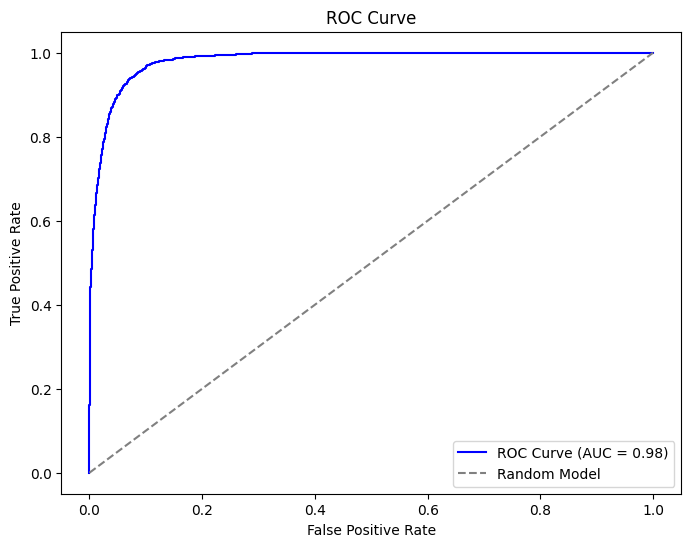

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (class 1)
y_probs = best_model.predict_proba(X_test_encoded)[:, 1]  # Get probabilities of class 1

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')

# Plot Diagonal Reference Line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Model")

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [88]:
area=auc_score

In [89]:
import pandas as pd

# Predict probabilities using the best model
probs = best_model.predict_proba(X_test_encoded)[:, 1]  # Selecting probabilities for the positive class (1)

# Create a DataFrame with actual values and predicted probabilities
ks_df = pd.DataFrame({
    "truth": y_test,
    "probabilities": probs
})

# Display the first few rows
ks_df.head()


,truth,probabilities
33553,0,0.000012
9427,0,0.892710
199,0,0.343853
12447,0,0.694914
39489,0,0.001302


In [90]:
ks_df['decile'] = pd.qcut(ks_df['probabilities'], 10, labels=range(1, 11), duplicates='drop')
ks_df.head()


,truth,probabilities,decile
33553,0,0.000012,2
9427,0,0.892710,10
199,0,0.343853,9
12447,0,0.694914,9
39489,0,0.001302,5


In [91]:
ks_summary = ks_df.groupby('decile').agg(
    total_count=('truth', 'count'),
    event_count=('truth', lambda x: (x == 1).sum()),
    non_event_count=('truth', lambda x: (x == 0).sum()),
    avg_probability=('probabilities', 'mean')
).reset_index()

# Display the KS Summary DataFrame
ks_summary.head()



C:\Users\madhu\AppData\Local\Temp\ipykernel_11756\1304449517.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ks_summary = ks_df.groupby('decile').agg(


,decile,total_count,event_count,non_event_count,avg_probability
0,1,1250,0,1250,0.000001
1,2,1250,0,1250,0.000010
2,3,1250,0,1250,0.000049
3,4,1250,0,1250,0.000226
4,5,1250,0,1250,0.001025


In [92]:
ks_summary = ks_summary.sort_values(by="decile", ascending=False)
ks_summary

,decile,total_count,event_count,non_event_count,avg_probability
9,10,1250,911,339,0.960608
8,9,1250,174,1076,0.569918
7,8,1250,16,1234,0.145215
6,7,1250,6,1244,0.027482
5,6,1250,1,1249,0.004925
4,5,1250,0,1250,0.001025
3,4,1250,0,1250,0.000226
2,3,1250,0,1250,0.000049
1,2,1250,0,1250,0.000010
0,1,1250,0,1250,0.000001


In [93]:
ks_summary["event_count_cum"] = ks_summary["event_count"].cumsum()
ks_summary["non_event_count_cum"] = ks_summary["non_event_count"].cumsum()


In [94]:
ks_summary

,decile,total_count,event_count,non_event_count,avg_probability,event_count_cum,non_event_count_cum
9,10,1250,911,339,0.960608,911,339
8,9,1250,174,1076,0.569918,1085,1415
7,8,1250,16,1234,0.145215,1101,2649
6,7,1250,6,1244,0.027482,1107,3893
5,6,1250,1,1249,0.004925,1108,5142
4,5,1250,0,1250,0.001025,1108,6392
3,4,1250,0,1250,0.000226,1108,7642
2,3,1250,0,1250,0.000049,1108,8892
1,2,1250,0,1250,0.000010,1108,10142
0,1,1250,0,1250,0.000001,1108,11392


In [95]:
# Compute cumulative event rate
ks_summary['cum_event_rate'] = (ks_summary['event_count_cum'] / ks_summary['event_count_cum'].max()) * 100

# Compute cumulative non-event rate
ks_summary['cum_non_event_rate'] = (ks_summary['non_event_count_cum'] / ks_summary['non_event_count_cum'].max()) * 100

# Display the updated DataFrame
ks_summary


,decile,total_count,event_count,non_event_count,avg_probability,event_count_cum,non_event_count_cum,cum_event_rate,cum_non_event_rate
9,10,1250,911,339,0.960608,911,339,82.220217,2.975772
8,9,1250,174,1076,0.569918,1085,1415,97.924188,12.420997
7,8,1250,16,1234,0.145215,1101,2649,99.368231,23.253160
6,7,1250,6,1244,0.027482,1107,3893,99.909747,34.173104
5,6,1250,1,1249,0.004925,1108,5142,100.000000,45.136938
4,5,1250,0,1250,0.001025,1108,6392,100.000000,56.109551
3,4,1250,0,1250,0.000226,1108,7642,100.000000,67.082163
2,3,1250,0,1250,0.000049,1108,8892,100.000000,78.054775
1,2,1250,0,1250,0.000010,1108,10142,100.000000,89.027388
0,1,1250,0,1250,0.000001,1108,11392,100.000000,100.000000


In [96]:
ks_summary['ks_statsics']=abs(ks_summary['cum_event_rate']-ks_summary['cum_non_event_rate'])
ks_summary

,decile,total_count,event_count,non_event_count,avg_probability,event_count_cum,non_event_count_cum,cum_event_rate,cum_non_event_rate,ks_statsics
9,10,1250,911,339,0.960608,911,339,82.220217,2.975772,79.244444
8,9,1250,174,1076,0.569918,1085,1415,97.924188,12.420997,85.503191
7,8,1250,16,1234,0.145215,1101,2649,99.368231,23.253160,76.115071
6,7,1250,6,1244,0.027482,1107,3893,99.909747,34.173104,65.736643
5,6,1250,1,1249,0.004925,1108,5142,100.000000,45.136938,54.863062
4,5,1250,0,1250,0.001025,1108,6392,100.000000,56.109551,43.890449
3,4,1250,0,1250,0.000226,1108,7642,100.000000,67.082163,32.917837
2,3,1250,0,1250,0.000049,1108,8892,100.000000,78.054775,21.945225
1,2,1250,0,1250,0.000010,1108,10142,100.000000,89.027388,10.972612
0,1,1250,0,1250,0.000001,1108,11392,100.000000,100.000000,0.000000


In [99]:
from joblib import dump

model_data = {
    'model': best_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifact/model_data.joblib')


['artifact/model_data.joblib']

In [ ]:
Gini_Co=2*area-1
Gini_Co

In [ ]:
for col in X_train_encoded.columns:
    print(f"Feature: {col}")
    print(f"Unique Values: {X_train_encoded[col].unique()}")
    print("-" * 50)
